In [20]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

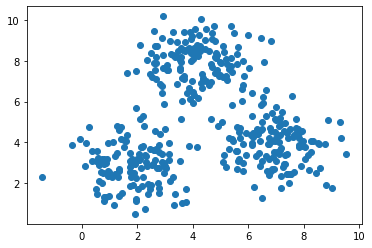

In [52]:
centers = [[2,3],[7,4],[4,8]]
X, _ = make_blobs(n_samples=400, centers=centers, cluster_std = 1)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [53]:
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Estimated number of clusters is: ", n_clusters_)



[[6.91966057 3.99555845]
 [4.13028522 7.95545983]
 [1.89536448 2.87858036]]
Estimated number of clusters is:  3


We can see that the predicted centers are approximately similar to what we took as centers.

In [48]:
colors = 10*['r.','g.','b.','c.','k.','y.','m.']

print(colors)
print(labels)



['r.', 'g.', 'b.', 'c.', 'k.', 'y.', 'm.', 'r.', 'g.', 'b.', 'c.', 'k.', 'y.', 'm.', 'r.', 'g.', 'b.', 'c.', 'k.', 'y.', 'm.', 'r.', 'g.', 'b.', 'c.', 'k.', 'y.', 'm.', 'r.', 'g.', 'b.', 'c.', 'k.', 'y.', 'm.', 'r.', 'g.', 'b.', 'c.', 'k.', 'y.', 'm.', 'r.', 'g.', 'b.', 'c.', 'k.', 'y.', 'm.', 'r.', 'g.', 'b.', 'c.', 'k.', 'y.', 'm.', 'r.', 'g.', 'b.', 'c.', 'k.', 'y.', 'm.', 'r.', 'g.', 'b.', 'c.', 'k.', 'y.', 'm.']
[2 2 0 2 1 1 0 1 1 2 1 0 0 1 1 0 1 1 2 1 0 2 0 2 1 2 2 0 1 1 2 2 2 0 0 2 1
 1 2 2 2 1 2 1 0 1 1 0 2 2 0 2 2 2 0 1 1 1 0 0 2 2 1 0 1 2 1 1 0 1 1 0 0 1
 0 1 1 1 2 2 0 1 0 0 0 0 2 2 1 0 0 0 0 2 2 1 1 2 1 2 1 1 2 2 2 0 0 0 0 0 1
 2 0 2 2 2 0 0 0 2 2 2 1 1 1 0 0 1 2 1 0 0 2 0 1 0 2 1 0 2 2 1 0 0 0 1 1 0
 1 1 2 2 0 0 2 1 1 1 0 0 2 1 2 2 1 2 0 1 0 2 1 0 1 1 1 2 0 2 2 0 0 1 2 1 2
 2 0 1 0 0 0 0 1 2 0 0 0 0 1 0 2 1 1 1 0 2 2 1 1 2 0 1 2 0 0 2 2 2 1 2 1 2
 1 2 2 1 2 0 0 0 2 0 0 0 0 1 1 1 0 1 2 2 0 2 0 2 2 2 2 1 1 1 1 2 2 2 0 2 2
 2 1 0 0 2 2 1 0 0 1 0 2 1 0 2 0 2 0 2 0 1 1 0 2 0 1 0

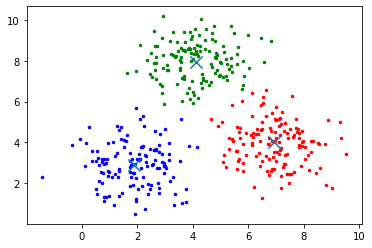

In [54]:
for i in range(len(X)):
  plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 5)
           
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
            marker="x", s=150, linewidths =20, zorder=10)

plt.show()